# SVM

In [ ]:
import numpy as np
import os
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay,plot_confusion_matrix, accuracy_score
from sklearn import svm
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

In [ ]:
def find_optimum_hyperplane(X_train,y_train,X_val,y_val, C_range):

    validation_scores = []
    train_scores = []

    for C in C_range:

        kernel = svm.SVC(C = C, random_state=0)

        kernel.fit(X_train, y_train);

         # train on traning set
        train_scores.append(kernel.score(X_train, y_train))
        # test on validation set
        validation_scores.append(kernel.score(X_val,y_val))
    return train_scores,validation_scores

In [ ]:
X_train_scaled = np.loadtxt("Data_files/x_train_scaled.csv",delimiter=',')
y_train_scaled = np.loadtxt("Data_files/y_train_scaled.csv",delimiter=',', dtype=str)
X_val_scaled = np.loadtxt("Data_files/x_val_scaled.csv",delimiter=',')
y_val_scaled = np.loadtxt("Data_files/y_val_scaled.csv",delimiter=',', dtype=str)
X_test_scaled = np.loadtxt("Data_files/x_test_scaled.csv",delimiter=',')
y_test_scaled = np.loadtxt("Data_files/y_test_scaled.csv",delimiter=',', dtype=str)

In [ ]:
C_range = [500, 100, 10, 1.0,0.1,0.01]
train_accuracy, validation_accuracy = find_optimum_hyperplane(X_train_scaled,y_train_scaled,X_val_scaled,y_val_scaled,C_range)

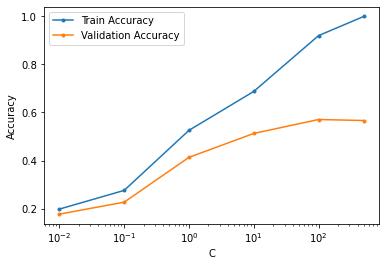

In [ ]:
plt.figure()
plt.plot(C_range, train_accuracy,label="Train Accuracy",marker='.')
plt.plot(C_range, validation_accuracy,label="Validation Accuracy",marker='.')
plt.xscale('log')
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('EDA_plot/svm_train_validation.png')
plt.show();

In [ ]:
kernel_svm = svm.SVC(C = 100, random_state=0)
kernel_svm.fit(X_train_scaled, y_train_scaled);

y_pred = kernel_svm.predict(X_test_scaled)
print("svm Classifier accuracy: ", accuracy_score(y_test_scaled, y_pred))


svm Classifier accuracy:  0.5851851851851851


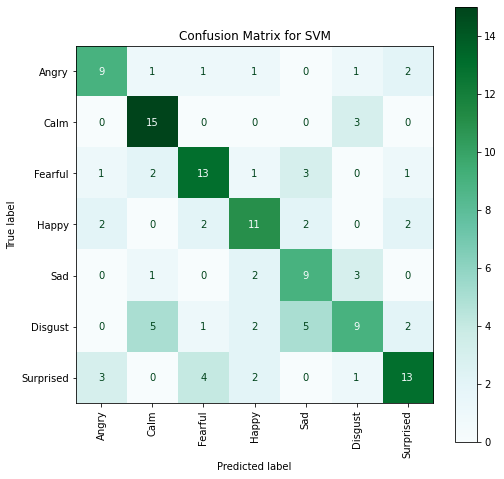

In [ ]:
cm_svm = confusion_matrix(y_test_scaled, y_pred)
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=['Angry', 'Calm', 'Fearful', 'Happy','Sad','Disgust','Surprised'])
fig, ax = plt.subplots(figsize=(8,8))
ax.set_title('Confusion Matrix for SVM')

disp_svm.plot(xticks_rotation='vertical', ax=ax, cmap='BuGn')
plt.savefig('EDA_plot/svm_confusion_matrix.png')
plt.show()

In [ ]:
print(classification_report(y_test_scaled, y_pred))

              precision    recall  f1-score   support

           0       0.60      0.60      0.60        15
           1       0.62      0.83      0.71        18
           2       0.62      0.62      0.62        21
           3       0.58      0.58      0.58        19
           4       0.47      0.60      0.53        15
           5       0.53      0.38      0.44        24
           6       0.65      0.57      0.60        23

    accuracy                           0.59       135
   macro avg       0.58      0.60      0.58       135
weighted avg       0.59      0.59      0.58       135

